# Comparaison between brasilian car prices and international car prices

In [2]:
# importando bibliotecas

import numpy as np           
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# formatações e opções
%matplotlib inline
pd.options.display.float_format = '{:.4f}'.format

In [3]:
# carregando o dataset da FIPE
df_br = pd.read_csv ('data/fipe_cars.csv')
df_br.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021,January,038001-6,tlp4qry07m,Acura,NSX 3.0,Gasoline,manual,3.0000,1995,40374.0000
1,2021,January,038001-6,s1wksdv9by,Acura,NSX 3.0,Gasoline,manual,3.0000,1994,38939.0000
2,2021,January,038001-6,skrbcfnkch,Acura,NSX 3.0,Gasoline,manual,3.0000,1993,37648.0000
3,2021,January,038001-6,rxzh76d5db,Acura,NSX 3.0,Gasoline,manual,3.0000,1992,35962.0000
4,2021,January,038001-6,qrm322tpd8,Acura,NSX 3.0,Gasoline,manual,3.0000,1991,32863.0000


In [8]:
# carregando o dataset da USA
df_usa = pd.read_csv ('data/cars.csv', encoding='UTF-16')
df_usa.head()

,Brand,Model,Year,Status,Mileage,Dealer,Price
0,Mazda,CX-5,2023,New,NaN,NaN,36703.0000
1,Kia,Sportage,2023,New,NaN,Classic Kia,28990.0000
2,Chevrolet,Camaro,2024,New,NaN,Classic Chevrolet Beaumont,41425.0000
3,Ford,Bronco,2023,Used,1551.0000,Mike Smith Chrysler Dodge Jeep RAM,58900.0000
4,Acura,TLX,2021,Used,30384.0000,Mike Smith Nissan,34499.0000


In [20]:
df_br['brand_model'] = df_br['brand'] + " " + df_br['model']
df_usa['brand_model'] = df_usa['Brand'] + " " + df_usa['Model']
df_br

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,brand_model
0,2021,January,038001-6,tlp4qry07m,Acura,NSX 3.0,Gasoline,manual,3.0000,1995,40374.0000,Acura NSX 3.0
1,2021,January,038001-6,s1wksdv9by,Acura,NSX 3.0,Gasoline,manual,3.0000,1994,38939.0000,Acura NSX 3.0
2,2021,January,038001-6,skrbcfnkch,Acura,NSX 3.0,Gasoline,manual,3.0000,1993,37648.0000,Acura NSX 3.0
3,2021,January,038001-6,rxzh76d5db,Acura,NSX 3.0,Gasoline,manual,3.0000,1992,35962.0000,Acura NSX 3.0
4,2021,January,038001-6,qrm322tpd8,Acura,NSX 3.0,Gasoline,manual,3.0000,1991,32863.0000,Acura NSX 3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
599002,2023,January,061001-1,lyjw9hl31c8q,Walk,Buggy Walk Sport 1.6 8V 58cv,Gasoline,manual,1.6000,2009,22790.0000,Walk Buggy Walk Sport 1.6 8V 58cv
599003,2023,January,061001-1,lp754qj0j65h,Walk,Buggy Walk Sport 1.6 8V 58cv,Gasoline,manual,1.6000,2008,22169.0000,Walk Buggy Walk Sport 1.6 8V 58cv
599004,2023,January,061001-1,lg5njyk9js18,Walk,Buggy Walk Sport 1.6 8V 58cv,Gasoline,manual,1.6000,2007,21565.0000,Walk Buggy Walk Sport 1.6 8V 58cv
599005,2023,January,061001-1,k789g5qzz3y1,Walk,Buggy Walk Sport 1.6 8V 58cv,Gasoline,manual,1.6000,2006,20978.0000,Walk Buggy Walk Sport 1.6 8V 58cv


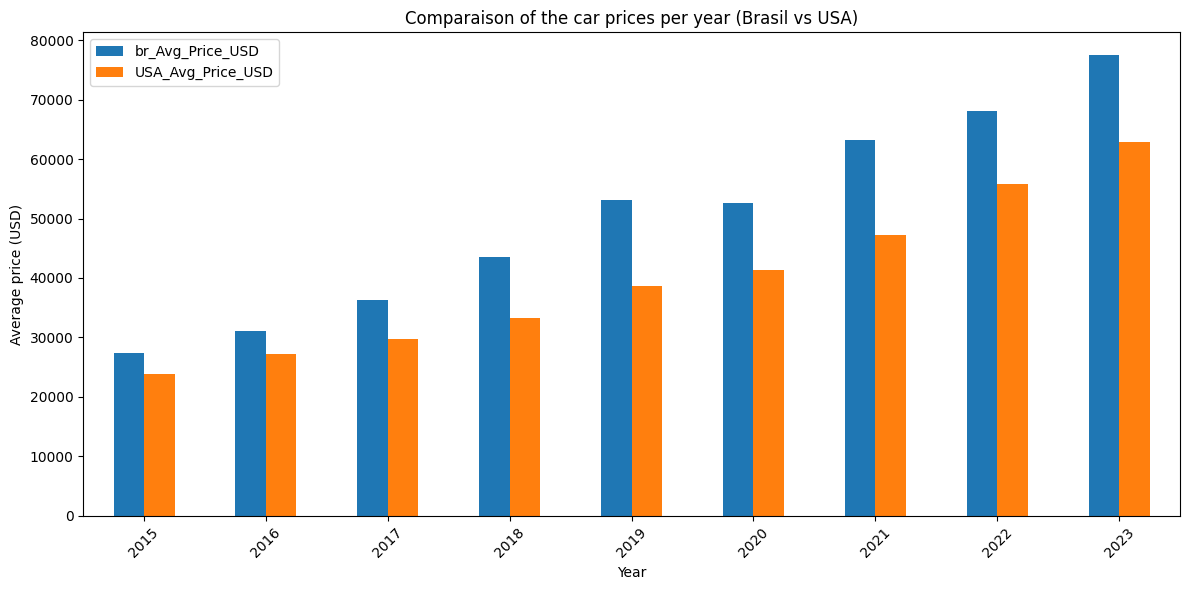

   Year  br_Avg_Price_USD  USA_Avg_Price_USD  Price_Difference
0  2015        27364.9984         23805.4050         3559.5935
1  2016        31026.8289         27179.3897         3847.4391
2  2017        36250.4681         29692.4325         6558.0356
3  2018        43495.3145         33250.3132        10245.0013
4  2019        53060.6324         38580.6732        14479.9592
5  2020        52683.3659         41293.6891        11389.6768
6  2021        63264.0356         47147.9028        16116.1328
7  2022        68145.1307         55818.6060        12326.5246
8  2023        77432.0588         62838.2634        14593.7953


In [ ]:
# preprocessing of data
# Brésil : Groupby year
df_br = df_br[df_br['year_model'] >= 2015]
df_usa = df_usa[df_usa['Year'] >= 2015]
br_avg_price_by_year = df_br.groupby('year_model')['avg_price_brl'].mean().reset_index()

# Conversion in USD
exchange_rate = 0.20  
br_avg_price_by_year['avg_price_usd'] = br_avg_price_by_year['avg_price_brl'] * exchange_rate

# USA : Groupby year
usa_avg_price_by_year = df_usa.groupby('Year')['Price'].mean().reset_index()

# Rename
br_avg_price_by_year.rename(columns={'year_model': 'Year'}, inplace=True)
usa_avg_price_by_year.rename(columns={'Price': 'USA_Avg_Price_USD'}, inplace=True)
br_avg_price_by_year.rename(columns={'avg_price_usd': 'br_Avg_Price_USD'}, inplace=True)

# Merge
comparison = pd.merge(br_avg_price_by_year[['Year', 'br_Avg_Price_USD']],
                      usa_avg_price_by_year,
                      on='Year', how='inner')  

# Differences
comparison['Price_Difference'] = comparison['br_Avg_Price_USD'] - comparison['USA_Avg_Price_USD']

# Vizualisation of the results
comparison.plot(x='Year', y=['br_Avg_Price_USD', 'USA_Avg_Price_USD'], kind='bar', figsize=(12, 6))
plt.title("Comparaison of the car prices per year (Brasil vs USA)")
plt.ylabel("Average price (USD)")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(comparison)